# NetworkX
Website: [https://networkx.org](https://networkx.org)  
Tutorial: [https://networkx.org/documentation/stable/tutorial.html](https://networkx.org/documentation/stable/tutorial.html)

In [1]:
import networkx as nx

# for drawing
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

# Undirected graph

In [2]:
G = nx.Graph()

G.add_edge(0, 5, weight=1, sign = "pos")
G.add_edge(2, 0, weight=2)
G.add_edge(1, 5, weight=3)
G.add_edge(1, 3, weight=1, sign = "neg")
G.add_edge(3, 5, weight=1)
G.add_edge(5, 6, weight=1)
G.add_edge(6, 5, weight=1)
G.add_edge(5, 2, weight=1)
G.add_edge(6, 2, weight=1)

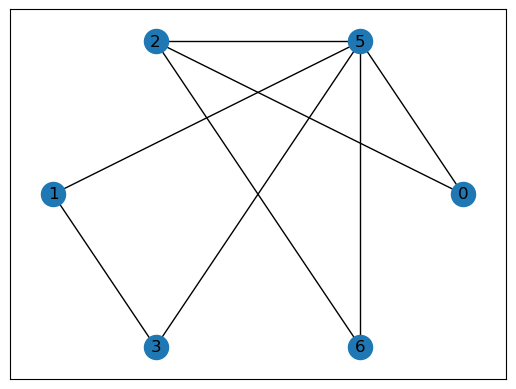

In [3]:
pos = nx.circular_layout(G)
nx.draw_networkx(G,pos,with_labels = True)
#edge_labels = {(x, y): G.get_edge_data(x, y)['weight'] for x, y in G.edges()}
#edge_labels = {(x, y): 0 for x, y in G.edges()}
#edge_labels = {(x, y): G.get_edge_data(x, y).get("sign", "") for x, y in G.edges()}
#ed = nx.draw_networkx_edge_labels(G, pos, alpha=0.5, label_pos=0.25, 
#                             rotate=False, edge_labels=edge_labels)

In [4]:
G[1]

AtlasView({5: {'weight': 3}, 3: {'weight': 1, 'sign': 'neg'}})

In [5]:
G[5]

AtlasView({0: {'weight': 1, 'sign': 'pos'}, 1: {'weight': 3}, 3: {'weight': 1}, 6: {'weight': 1}, 2: {'weight': 1}})

nx.Graph is a dictionary of dictionaries of dictionaries

In [6]:
nx.to_dict_of_dicts(G)

{0: {5: {'weight': 1, 'sign': 'pos'}, 2: {'weight': 2}},
 5: {0: {'weight': 1, 'sign': 'pos'},
  1: {'weight': 3},
  3: {'weight': 1},
  6: {'weight': 1},
  2: {'weight': 1}},
 2: {0: {'weight': 2}, 5: {'weight': 1}, 6: {'weight': 1}},
 1: {5: {'weight': 3}, 3: {'weight': 1, 'sign': 'neg'}},
 3: {1: {'weight': 1, 'sign': 'neg'}, 5: {'weight': 1}},
 6: {5: {'weight': 1}, 2: {'weight': 1}}}

In [7]:
# Iterate over nodes of G
for n in G:
    print(f"G contains node {n}")

G contains node 0
G contains node 5
G contains node 2
G contains node 1
G contains node 3
G contains node 6


In [8]:
0 in G

True

In [9]:
7 in G

False

In [10]:
G[1][3]

{'weight': 1, 'sign': 'neg'}

In [11]:
G[1][3]["sign"]

'neg'

In [ ]:
for nbr in G[5]:
    print(f"{nbr} is a neighbor of node 5")

# Drawing

Drawing graphs: [https://networkx.org/documentation/stable/reference/drawing.html#drawing](https://networkx.org/documentation/stable/reference/drawing.html#drawing)  
Using layouts: [https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout)

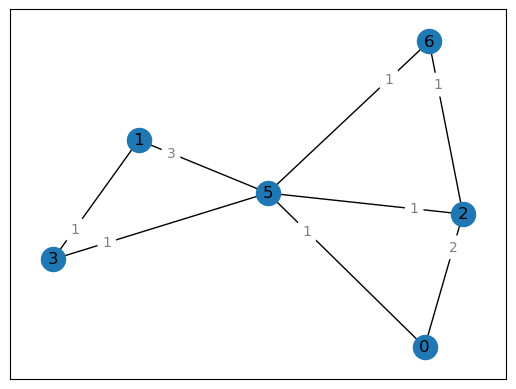

In [41]:
pos = nx.spring_layout(G)
#pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = {(x, y): G.get_edge_data(x, y)['weight'] for x, y in G.edges()}
ed = nx.draw_networkx_edge_labels(G, pos, alpha=0.5, label_pos=0.25, 
                             rotate=False, edge_labels=edge_labels)

# Directed graph

In [47]:
D = nx.DiGraph()
D.add_edge(5, 0)
D.add_edge(0, 5)
D.add_edge(2, 0)
D.add_edge(1, 5)
D.add_edge(1, 3)
D.add_edge(3, 5)
D.add_edge(5, 6)
D.add_edge(6, 5)
D.add_edge(5, 2)
D.add_edge(6, 2)


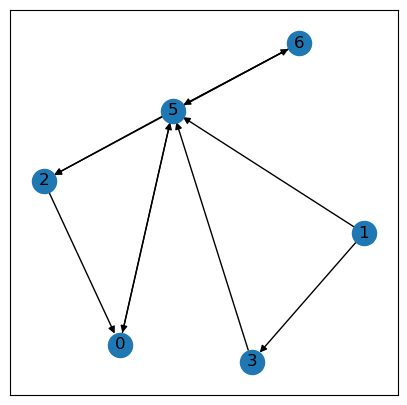

In [48]:
plt.figure(figsize=(5,5))
#pos = nx.circular_layout(D)
pos = graphviz_layout(D, prog="dot") #dot draws graphs as hierarchies
nx.draw_networkx(D,with_labels = True)

# Tree

In [22]:
T = nx.DiGraph()
T.add_edge(0,1)
T.add_edge(0,2)
T.add_edge(1,3)
T.add_edge(1,4)
T.add_edge(2,5)
T.add_edge(2,6)

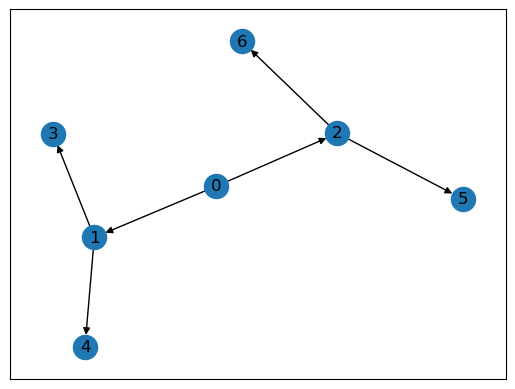

In [37]:
pos = graphviz_layout(T, prog="dot") #dot draws graphs as hierarchies
nx.draw_networkx(T, with_labels=True)

In [ ]:
# https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.balanced_tree.html?highlight=balanced_tree
TT = nx.balanced_tree(2,2)
pos = graphviz_layout(TT, prog="dot")
nx.draw_networkx(TT, pos, with_labels=True)

# Graph traversals: depth first

<img src="tree.jpg" alt="drawing" width="200"/>

In [24]:
list(nx.dfs_preorder_nodes(T, source=0))

[0, 1, 3, 4, 2, 5, 6]

## Recursive dfs

In [25]:
# depth first search
def dfs_recursive(graph, v, visited = None):
    if visited is None:
        visited = []
    print(f"visiting node {v}")
    visited.append(v)
    n_list = [w for w in graph[v] if w not in visited]
    print(f"\tneighbors of {v}: {n_list}")
    for w in n_list:
        if w not in visited:
            dfs_recursive(graph, w, visited)

In [26]:
dfs_recursive(T,0)

visiting node 0
	neighbors of 0: [1, 2]
visiting node 1
	neighbors of 1: [3, 4]
visiting node 3
	neighbors of 3: []
visiting node 4
	neighbors of 4: []
visiting node 2
	neighbors of 2: [5, 6]
visiting node 5
	neighbors of 5: []
visiting node 6
	neighbors of 6: []


In [27]:
dfs_recursive(D,0)

visiting node 0
	neighbors of 0: [5]
visiting node 5
	neighbors of 5: [6, 2]
visiting node 6
	neighbors of 6: [2]
visiting node 2
	neighbors of 2: []


In [28]:
dfs_recursive(G,0)

visiting node 0
	neighbors of 0: [5, 2]
visiting node 5
	neighbors of 5: [1, 3, 6, 2]
visiting node 1
	neighbors of 1: [3]
visiting node 3
	neighbors of 3: []
visiting node 6
	neighbors of 6: [2]
visiting node 2
	neighbors of 2: []


## Iterative: stack

In [29]:
def dfs_iterative(graph, v):
    visited = []
    stack = []
    stack.append(v)
    while not len(stack) == 0:
        v = stack.pop()
        if v not in visited:
            print(v, end=" ")
            visited.append(v)
            neighbours = list(graph[v])
            neighbours.reverse()  # to have same result as recursive
            for w in neighbours:
                stack.append(w)

In [30]:
dfs_iterative(T,0)

0 1 3 4 2 5 6 

# Connected

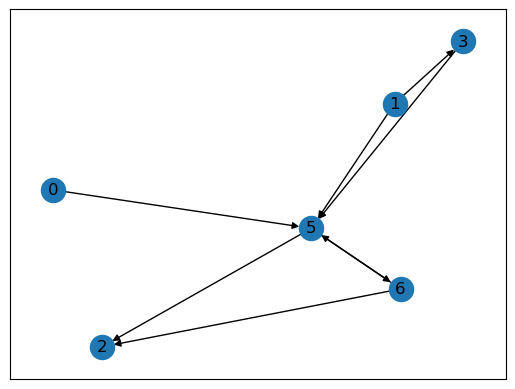

In [31]:
nx.draw_networkx(D,with_labels = True)

In [ ]:
nx.is_strongly_connected(D)

In [ ]:
Dp = D.copy()
Dp.add_edge(5,1)
nx.is_strongly_connected(Dp)

In [ ]:
nx.draw_networkx(Dp,with_labels = True)

In [ ]:
nx.is_connected(G)

In [ ]:
nx.is_strongly_connected(T)

## Adjacency matrix

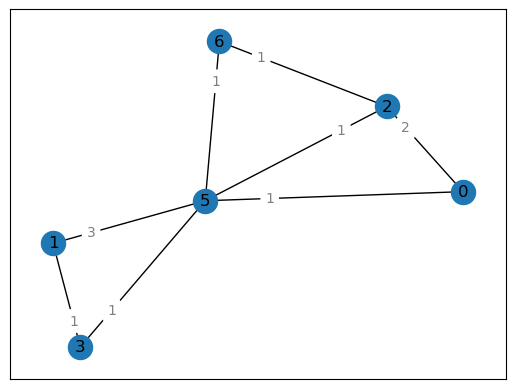

In [42]:
pos = nx.spring_layout(G)
#pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = {(x, y): G.get_edge_data(x, y)['weight'] for x, y in G.edges()}
ed = nx.draw_networkx_edge_labels(G, pos, alpha=0.5, label_pos=0.25, 
                             rotate=False, edge_labels=edge_labels)


In [43]:
print(nx.to_numpy_array(G)) # uses the order of nodes in G.nodes

[[0. 1. 2. 0. 0. 0.]
 [1. 0. 1. 3. 1. 1.]
 [2. 1. 0. 0. 0. 1.]
 [0. 3. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0.]]


In [ ]:
G.nodes